In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

title_font_size = 30
label_font_size = 20

plt.rc('font', size=title_font_size) #controls default text size
plt.rc('axes', titlesize=title_font_size) #fontsize of the title
plt.rc('axes', labelsize=label_font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=label_font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=label_font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=label_font_size) #fontsize of the legend

In [2]:
mat = loadmat('data_94b.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ROI', 't', 'None', 'names', 'rICT', '__function_workspace__'])


In [3]:
num_vessels = mat['names'].shape[1]
m_rICT = mat['rICT']
m_ROI = mat['ROI']
m_t = mat['t'] #(datetime only)
t = m_t.reshape((m_t.shape[1]))

In [4]:
print(f"Number of vessels: {num_vessels}")
print(f"m_rICT shape: {m_rICT.shape}")

rict_df = pd.DataFrame(m_rICT)
print(f"rict_df shape: {rict_df.shape}")
rict_df.head()

Number of vessels: 7
m_rICT shape: (3034, 7)
rict_df shape: (3034, 7)


,0,1,2,3,4,5,6
0,1.061179,1.017361,1.114077,1.096296,1.147843,1.121544,1.109880
1,1.036253,0.968635,1.059771,1.021505,1.105764,1.083047,1.038855
2,1.073106,1.013525,1.078420,1.078318,1.058356,1.081180,1.069371
3,0.970642,0.959467,0.993976,0.988432,1.011027,1.045294,0.961510
4,0.957931,0.932092,0.951927,0.953285,0.935990,0.973522,0.945293


Text(0, 0.5, 'rICT')

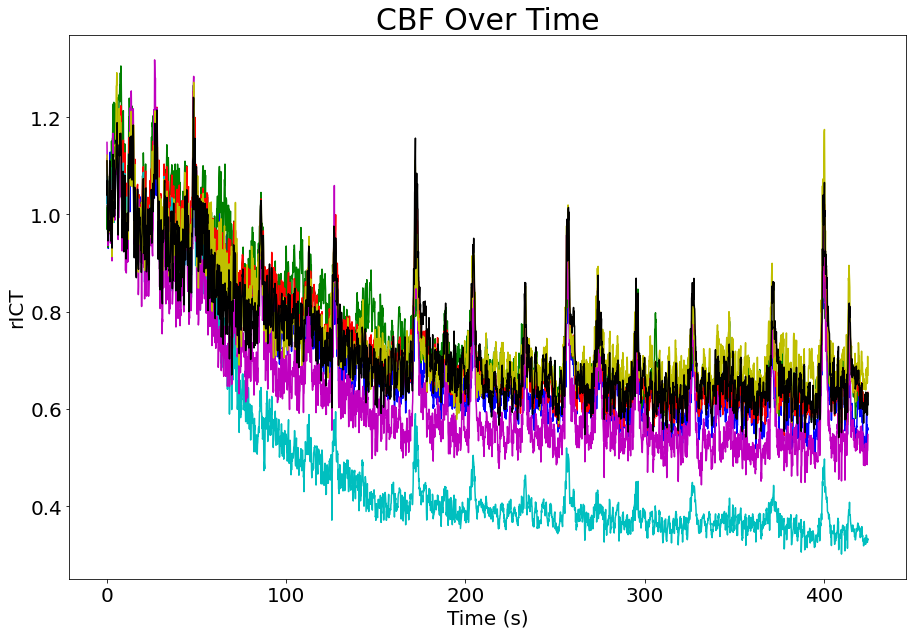

In [5]:
plt.figure(figsize=(15,10))
color_arr = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(7):
    plt.plot(t, rict_df.iloc[:, i], color=color_arr[i])
plt.title("CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')
#plt.legend([1, 2, 3, 4, 5, 6, 7])

Text(0, 0.5, 'rICT')

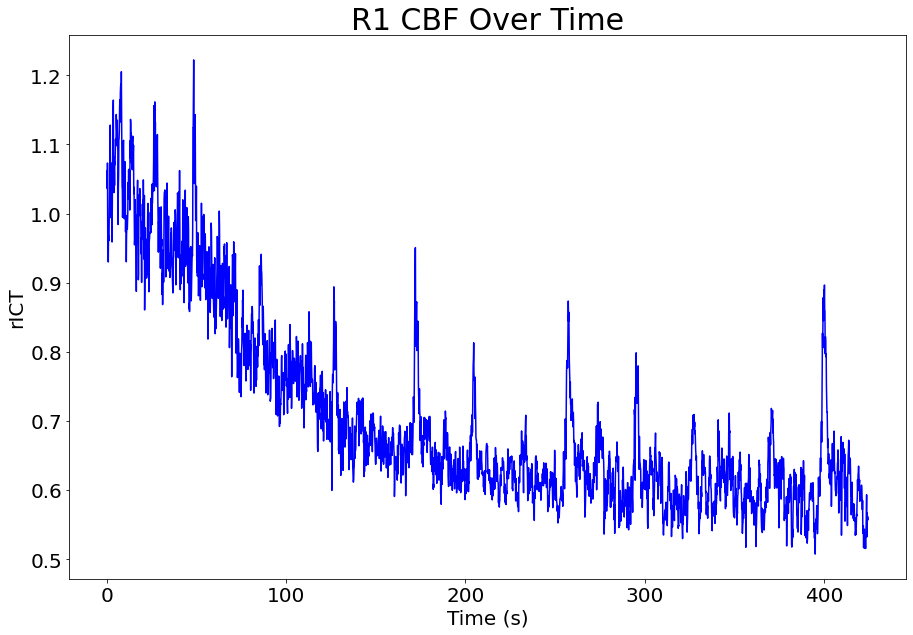

In [8]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 0], color=color_arr[0])
plt.title("R1 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

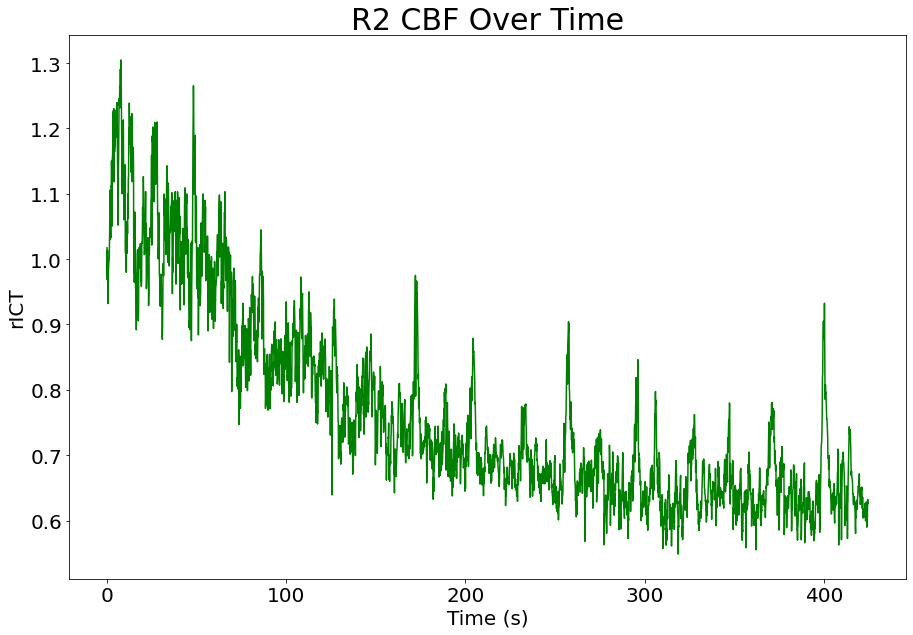

In [9]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 1], color=color_arr[1])
plt.title("R2 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

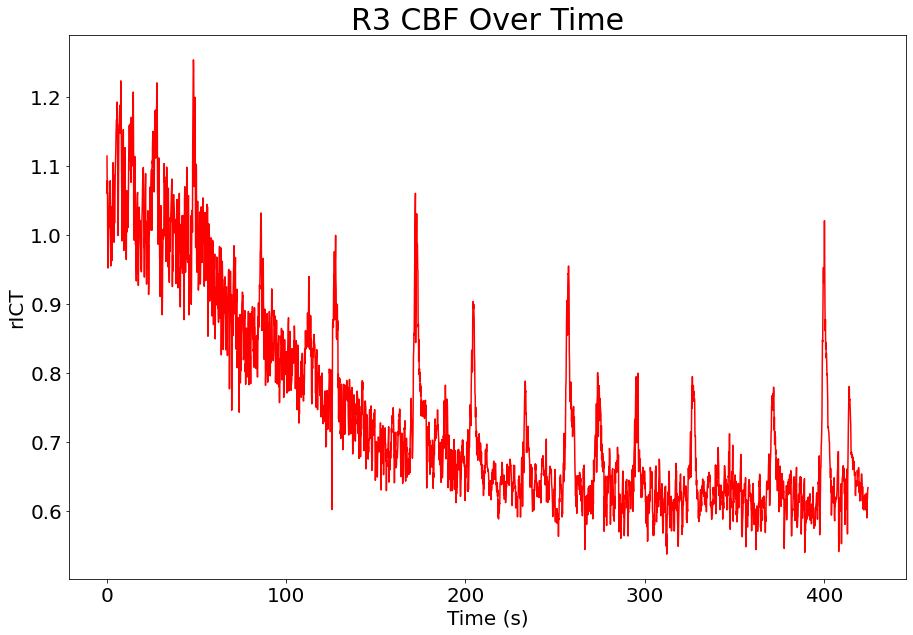

In [10]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 2], color=color_arr[2])
plt.title("R3 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

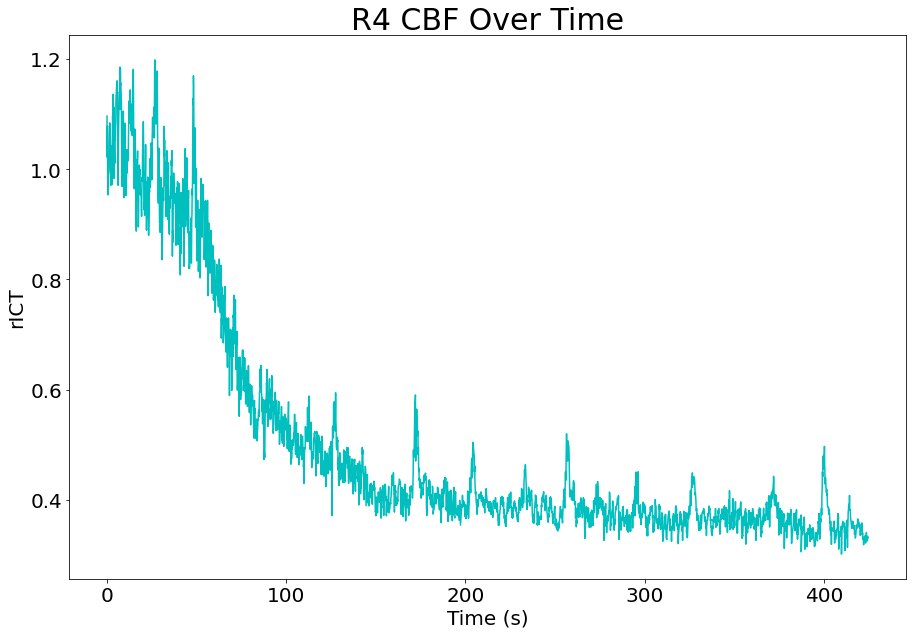

In [11]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 3], color=color_arr[3])
plt.title("R4 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

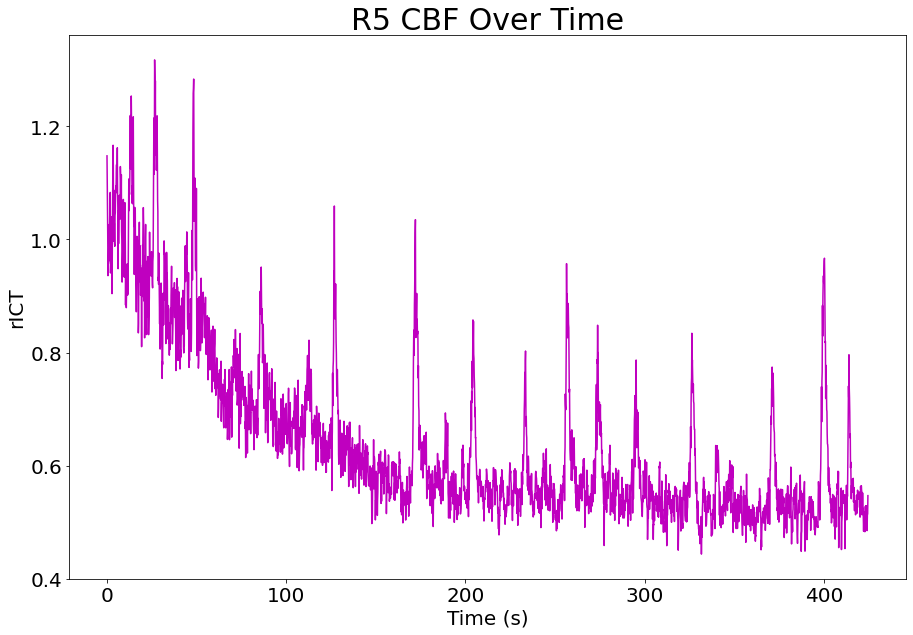

In [12]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 4], color=color_arr[4])
plt.title("R5 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

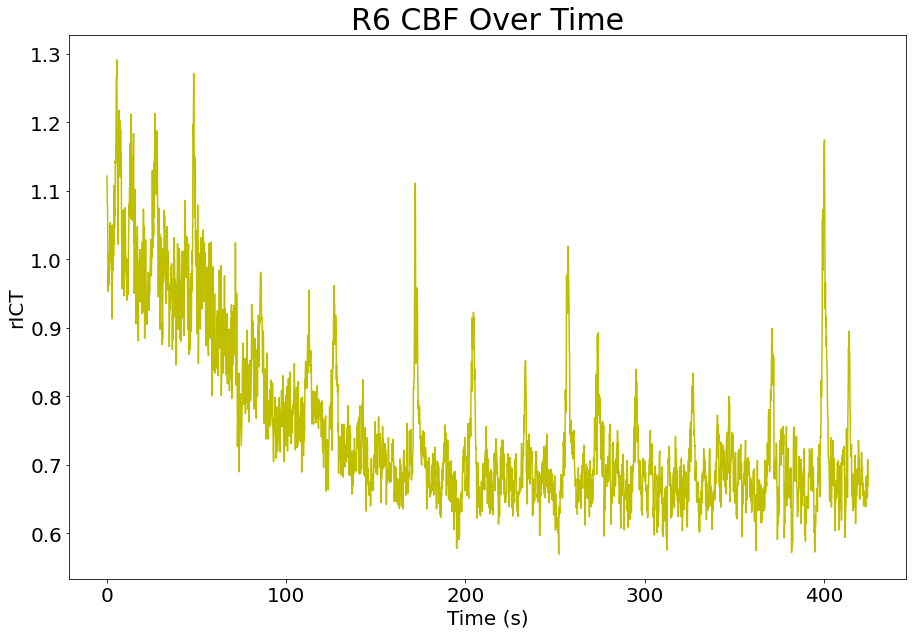

In [13]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 5], color=color_arr[5])
plt.title("R6 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

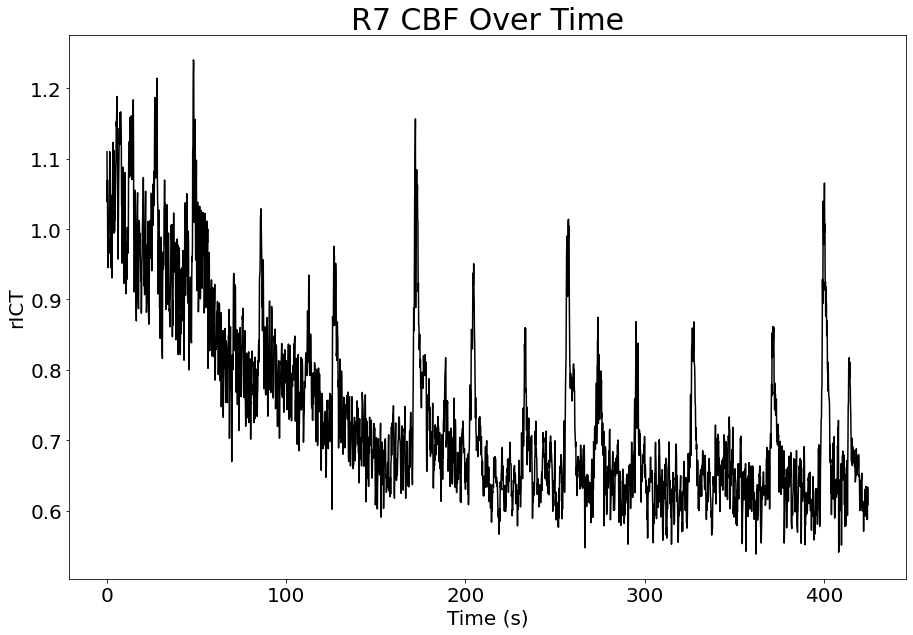

In [14]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 6], color=color_arr[6])
plt.title("R7 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

## Looking at ROI: 
> Just the boolean mask of the image he sent me

In [15]:
sum(sum(m_ROI))

array([115, 140,  41, 122,  93, 231, 230], dtype=uint8)

In [16]:
print(m_ROI.shape)

(994, 1094, 7)


In [17]:
m_ROI1 = m_ROI[:, :, 0]

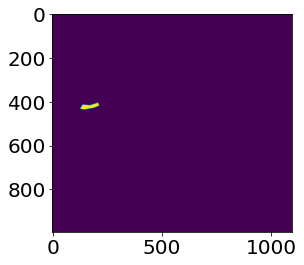

In [18]:
imgplot = plt.imshow(m_ROI1)

So on and so forth: we can create a boolean mask of each vessel and sum them into a single boolean mask.  No real reason to do this at this point.

## Setting Stroke Label

Text(0, 0.5, 'rICT')

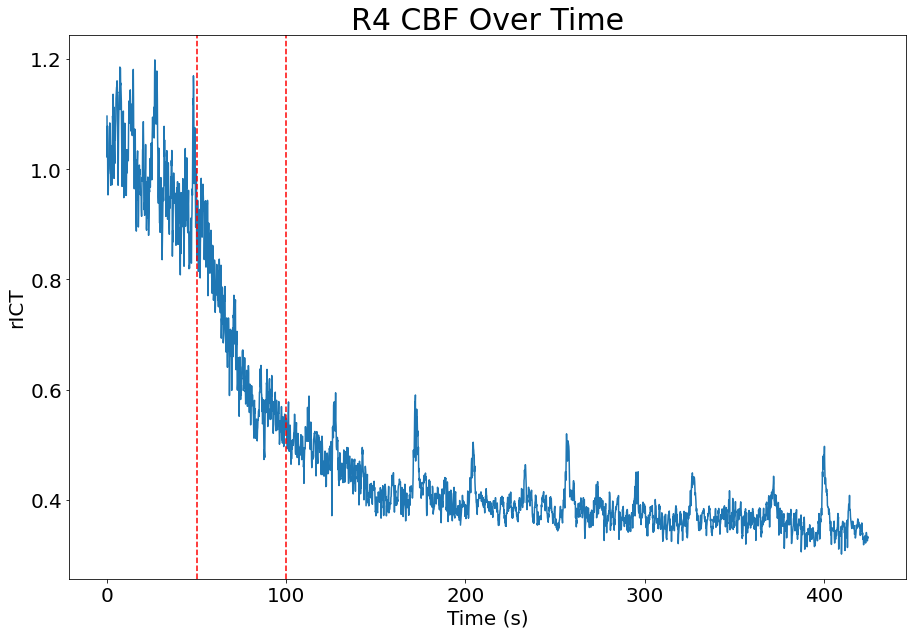

In [19]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 3])
plt.axvline(x=50, color='red', linestyle='--')
plt.axvline(x=100, color='red', linestyle='--')
plt.title("R4 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

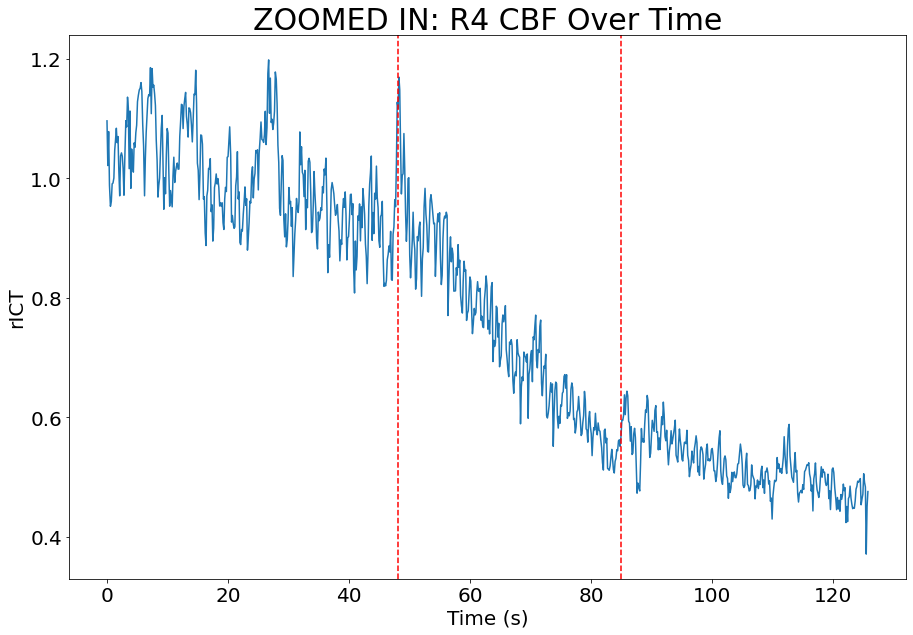

In [20]:
stroke_start = 48
stroke_window_end = 900
stroke_end = 85

plt.figure(figsize=(15,10))
plt.plot(t[:stroke_window_end], rict_df.iloc[:stroke_window_end, 3])
plt.axvline(x=stroke_start, color='red', linestyle='--')
plt.axvline(x=stroke_end, color='red', linestyle='--')
plt.title("ZOOMED IN: R4 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

## Making Labels

In [47]:
# Regression - single time stamp
# Could set no strokes to -1... should test
y_train_reg = np.zeros(num_vessels)
# This is where the stroke occurred, known a priori for now, for training
y_train_reg[3] = t[stroke_start]

# Classification - clustering of stroke occurrence
# Boolean mask
y_train_class = np.zeros((num_vessels, t.shape[0]))
y_train_class[3, stroke_start:stroke_end] = 1

y_train_class_1D = np.zeros(num_vessels)
y_train_class_1D[3] = 1

# Second Sample (95)

In [6]:
mat = loadmat('data_95q.mat')
print(mat.keys())

num_vessels = mat['names'].shape[1]
m_rICT = mat['rICT']
m_ROI = mat['ROI']
m_t = mat['t'] #(datetime only)
t = m_t.reshape((m_t.shape[1]))

print(f"Number of vessels: {num_vessels}")
print(f"m_rICT shape: {m_rICT.shape}")

rict_df = pd.DataFrame(m_rICT)
print(f"rict_df shape: {rict_df.shape}")
rict_df.head()

dict_keys(['__header__', '__version__', '__globals__', 'ROI', 't', 'None', 'names', 'rICT', '__function_workspace__'])
Number of vessels: 7
m_rICT shape: (4000, 7)
rict_df shape: (4000, 7)


,0,1,2,3,4,5,6
0,1.104496,1.065481,1.096309,1.066983,1.033309,1.050900,1.020680
1,1.070832,1.069529,1.116270,1.065764,0.971102,1.073872,1.043329
2,1.021953,1.009902,0.998641,1.011728,0.992180,1.027361,1.014699
3,1.018994,0.991405,1.013847,1.043583,0.970549,1.035323,1.035490
4,1.026853,1.005429,1.053537,1.052560,1.000330,1.069433,1.061703


Text(0, 0.5, 'rICT')

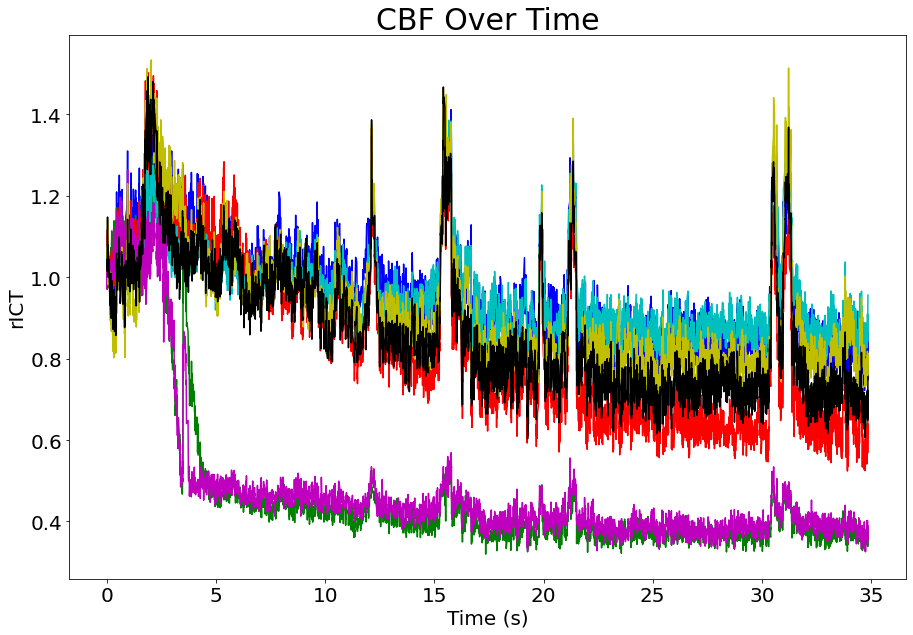

In [7]:
plt.figure(figsize=(15,10))
color_arr = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(7):
    plt.plot(t, rict_df.iloc[:, i], color=color_arr[i])
plt.title("CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')
#plt.legend([1, 2, 3, 4, 5, 6, 7])

Clearly, the stroke as occurred in vessels 2 and 5